# TP introduction to Machine Learning
Diane Lingrand (diane.lingrand@univ-cotedazur)

Julie Tores (julie.tores@univ-cotedazur.fr ou julie.tores@etu.univ-cotedazur.fr)

Polytech, SI4, 2023-24

In [4]:
#necessary imports
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## dataset: Iris

In [5]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Question 1:** how many data ?

In [6]:
print(len(X))

150


**Question 2**: type of data ? dimension of data ? type of labels ?

In [7]:
print(type(X[0][0]))
print(type(y[0]))
print(X.shape)
print(y.shape)

<class 'numpy.float64'>
<class 'numpy.int32'>
(150, 4)
(150,)


**Question 3:** How many classes ? How many samples per class ?

In [8]:
print("nombre de classes: ",len(np.unique(y)))
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

nombre de classes:  3
{0: 50, 1: 50, 2: 50}


**Question 4:** choose 2 dimensions and plot the data in the plane using a different color for each class.

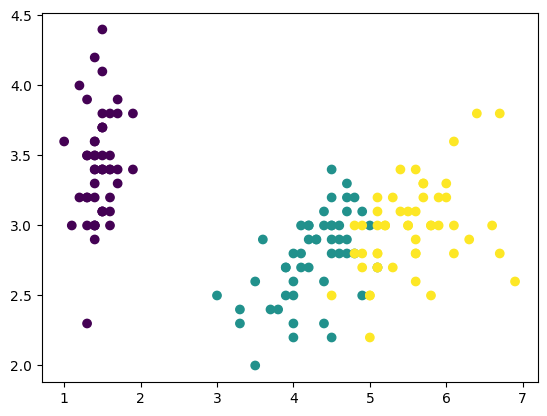

In [9]:
X0 =[]
X1 = []
for i in range(len(X)):
    X0.append(X[i][2])
    X1.append(X[i][1])
plt.scatter(X0,X1,c=y)


**Question 5:** perfect classification. What are the metrics values ? Read the documention of metrics function in scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [10]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# here is an example for accuracy: 
print("accuracy of the perfect classification", accuracy_score(y, y))
print("recall : ", recall_score(y,y,average="micro"))
print("F1 score : ", f1_score(y, y,average="micro"))
confusion_matrix(y,y)

accuracy of the perfect classification 1.0
recall :  1.0
F1 score :  1.0


array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

**Question 6**: random classification. What are the metrics values ? <br/>
*Hint*: use https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html for the generation of random labels. <br/>
Don't forget the confusion matrix. Hint: ConfusionMatrixDisplay https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

In [11]:
# here is an example for accuracy: 
listOfRandom = np.random.randint(3,size=150)
print("liste de randoms: ",listOfRandom)
print("accuracy of a random classification", accuracy_score(listOfRandom, y))
print("recall : ", recall_score(listOfRandom,y,average="micro"))
print("F1 score : ", f1_score(listOfRandom, y,average="micro"))
confusion_matrix(listOfRandom,y)

liste de randoms:  [2 0 0 0 2 0 1 2 0 1 2 2 1 1 2 1 2 2 2 1 1 2 2 0 2 1 1 0 1 1 2 0 1 0 1 0 0
 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 1 0 1 1 2 1 2 1 0 0 2 1 2 2 2 1 1 2 0 0 2 2
 0 1 1 0 2 1 0 2 0 1 0 2 0 2 2 2 1 1 0 0 1 0 2 1 2 0 0 2 1 0 1 0 2 0 1 2 0
 1 0 1 2 1 1 2 0 2 1 2 0 1 1 2 0 1 1 0 1 0 1 0 0 2 0 0 0 0 1 2 1 1 2 1 2 2
 2 2]
accuracy of a random classification 0.32
recall :  0.32
F1 score :  0.32


array([[16, 15, 17],
       [17, 17, 18],
       [17, 18, 15]], dtype=int64)

### binary classification

In [12]:
# we choose to remove class with label 2 (Iris Virginica)
XBinaire = X[y!=2]
yBinaire = y[y!=2]


In [13]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XBinaire, yBinaire, test_size=0.4)

**Question 7**: Try to build a classifier better than the random one, use the thresholding on one or more component. Choose the thresholds using the train dataset and compute the metrics on the test dataset.
    

In [14]:

#print("accuracy of the best x classification", accuracy_score(X_train[:40], X_test))
a = 0
b = 40
accFinal = accuracy_score(y_train[a:b],y_test)
while b < len(y_train):
    a+=1
    b+=1
    acc = accuracy_score(y_train[a:b],y_test)
    if acc > accFinal:
        accFinal = acc
print("Accuracy of the best y classification", accFinal)
#print("recall : ", recall_score(yBinaire,yBinaire,average="micro"))
#print("F1 score : ", f1_score(yBinaire, yBinaire,average="micro"))
#confusion_matrix(yBinaire,yBinaire)

Accuracy of the best y classification 0.625


In [15]:
"""
# CODE DU PROF
from sklearn.metrics import ConfusionMatrixDisplay
# Automatisation de la recherche
for i in range(X_train.shape[1]):
    if np.max(X_train[y_train==0,i]) < np.min(X_train[y_train==1,i]) or np.max(X_train[y_train==1,i]) < np.min(X_train[y_train==0,i]):
        print("la feature", i, "permet de séparer les 2 classes")
        plt.figure()
        scatter = plt.scatter(X_train[:, 0], X_train[:, i], c=y_train)
        plt.scatter(X_test[:, 0], X_test[:, i], c=y_test, marker="+", alpha=0.5)
        plt.xlabel("feature" + str(0))
        plt.ylabel("feature" + str(i))
        plt.legend(*scatter.legend_elements())
        if np.max(X_train[y_train==0,i]) < np.min(X_train[y_train==1,i]):
            threshold = np.mean([np.max(X_train[y_train==0,i]), np.min(X_train[y_train==1,i])])
            y_pred = [1 if l<threshold else 0 for l in X_test[:,2]]
        else:
            threshold = np.mean([np.max(X_train[y_train==1,i]), np.min(X_train[y_train==0,i])])
            y_pred = [0 if l<threshold else 1 for l in X_test[:,2]]
        plt.plot([np.min(X[:,0]), np.max(X[:,0])], [threshold, threshold], c="red")
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()
    else:
        print("la feature", i, "ne permet pas de séparer les 2 classes")
"""

'\n# CODE DU PROF\nfrom sklearn.metrics import ConfusionMatrixDisplay\n# Automatisation de la recherche\nfor i in range(X_train.shape[1]):\n    if np.max(X_train[y_train==0,i]) < np.min(X_train[y_train==1,i]) or np.max(X_train[y_train==1,i]) < np.min(X_train[y_train==0,i]):\n        print("la feature", i, "permet de séparer les 2 classes")\n        plt.figure()\n        scatter = plt.scatter(X_train[:, 0], X_train[:, i], c=y_train)\n        plt.scatter(X_test[:, 0], X_test[:, i], c=y_test, marker="+", alpha=0.5)\n        plt.xlabel("feature" + str(0))\n        plt.ylabel("feature" + str(i))\n        plt.legend(*scatter.legend_elements())\n        if np.max(X_train[y_train==0,i]) < np.min(X_train[y_train==1,i]):\n            threshold = np.mean([np.max(X_train[y_train==0,i]), np.min(X_train[y_train==1,i])])\n            y_pred = [1 if l<threshold else 0 for l in X_test[:,2]]\n        else:\n            threshold = np.mean([np.max(X_train[y_train==1,i]), np.min(X_train[y_train==0,i])])\n

**Question 8**: Using this method, could you propose an algorithm for classifying the 3 classes?

## dataset: digit

In [16]:
# reading the dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

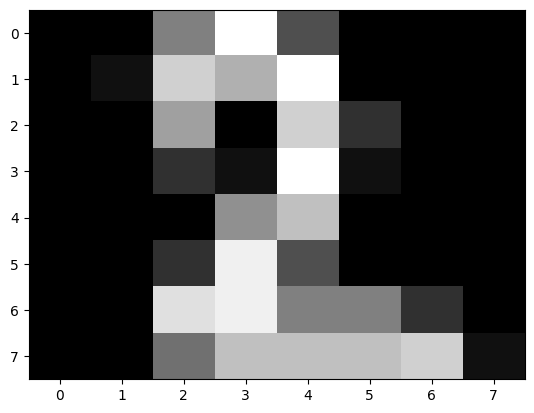

class =  2


In [17]:
#display one of the pictures (the 22th in this code)
import matplotlib.pyplot as plt
i = 22 #index of the image: change it in order to display other images
plt.imshow(X[i].reshape((8,8)),aspect="auto",cmap='gray')
plt.show()
print('class = ', y[i])

**Question 9**: Using the digit dataset, answer again to the previous questions from 1 to 8.

In [18]:
# Q1 :
print(len(X))

1797


In [19]:
# Q2 :
print(type(X[0][0]))
print(type(y[0]))
print(X.shape)
print(y.shape)

<class 'numpy.float64'>
<class 'numpy.int32'>
(1797, 64)
(1797,)


In [20]:
# Q3 : 
print("nombre de classes: ",len(np.unique(y)))
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

nombre de classes:  10
{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


# TP 2 : ARBRE DE DECISION

### QUESTION 1

In [21]:
def metricValues(tab1,tab2):
    print("accuracy = ", accuracy_score(tab1, tab2))
    print("recall = ",recall_score(tab1,tab2,average="macro"))
    print("f1_score = ",f1_score(tab1,tab2,average="macro"))
    print("confusion_matrix = \n",confusion_matrix(tab1,tab2))

In [22]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

myTree = tree.DecisionTreeClassifier()
myTree.fit(X_train, y_train)
ypred = myTree.predict(X_test)
metricValues(y_test,ypred)

accuracy =  0.8414464534075105
recall =  0.8407817312971304
f1_score =  0.8405046961836531
confusion_matrix = 
 [[73  0  0  1  0  4  0  0  0  0]
 [ 0 52  0  0  9  0  0  4  1  1]
 [ 1  2 61  2  1  0  0  0  2  0]
 [ 0  5  4 57  0  2  0  0  6  5]
 [ 0  1  0  0 63  4  1  2  1  0]
 [ 0  0  3  0  2 71  1  0  4  1]
 [ 0  1  0  0  4  2 60  0  2  0]
 [ 0  1  1  1  2  2  0 63  1  4]
 [ 0  6  2  2  1  0  0  0 50  2]
 [ 1  2  1  1  2  2  0  1  0 55]]


1.0


[Text(0.5, 0.9, 'x[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.3, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7692307692307693, 0.3, 'x[1] <

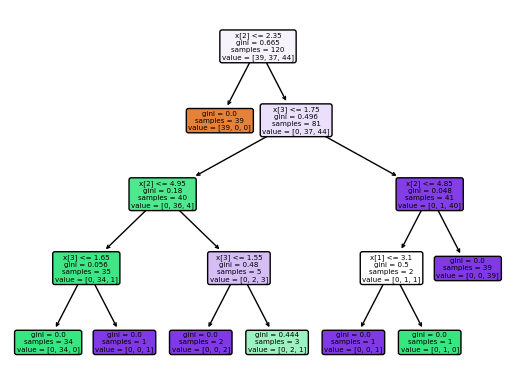

In [28]:
from sklearn import tree

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
myTree.fit(X_train, Y_train)
ypred = myTree.predict(X_test)
print (accuracy_score(Y_test,ypred))
tree.plot_tree(myTree, rounded=True, filled=True)


### QUESTION 2

0.625


[Text(0.5, 0.9, 'x[36] <= 0.5\ngini = 0.9\nsamples = 1437\nvalue = [151, 147, 141, 154, 151, 142, 137, 140, 135, 139]'),
 Text(0.25, 0.7, 'x[42] <= 7.5\ngini = 0.535\nsamples = 227\nvalue = [147, 0, 3, 1, 5, 19, 5, 0, 3, 44]'),
 Text(0.125, 0.5, 'x[21] <= 7.0\ngini = 0.437\nsamples = 62\nvalue = [1, 0, 1, 1, 0, 15, 0, 0, 0, 44]'),
 Text(0.0625, 0.3, 'x[51] <= 10.0\ngini = 0.227\nsamples = 16\nvalue = [1, 0, 1, 0, 0, 14, 0, 0, 0, 0]'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 0, 0, 14, 0, 0, 0, 0]'),
 Text(0.09375, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.1875, 0.3, 'x[26] <= 15.5\ngini = 0.084\nsamples = 46\nvalue = [0, 0, 0, 1, 0, 1, 0, 0, 0, 44]'),
 Text(0.15625, 0.1, 'gini = 0.043\nsamples = 45\nvalue = [0, 0, 0, 1, 0, 0, 0, 0, 0, 44]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]'),
 Text(0.375, 0.5, 'x[21] <= 0.5\ngini = 0.214\nsamples = 165\nvalue = [146, 0, 2, 0, 5, 4, 5, 0, 

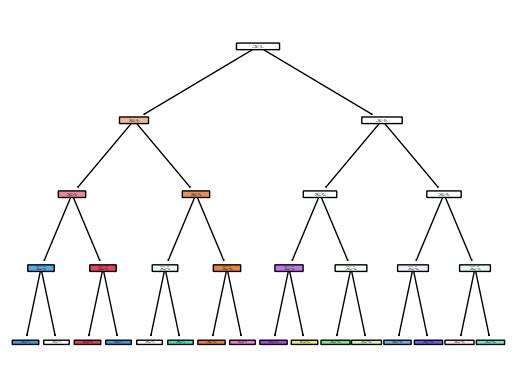

In [29]:
# reading the dataset
digits = datasets.load_digits()
XDigit = digits.data
yDigit = digits.target
X_trainDigit, X_testDigit, Y_trainDigit, Y_testDigit = train_test_split(XDigit, yDigit, test_size=0.2, random_state=0)
myTreeDigit = tree.DecisionTreeClassifier(max_depth=4)



# split into train and test datasets
from sklearn.model_selection import train_test_split

myTreeDigit.fit(X_trainDigit, Y_trainDigit)
ypredDigit = myTreeDigit.predict(X_testDigit)
print (accuracy_score(Y_testDigit,ypredDigit))
tree.plot_tree(myTreeDigit, rounded=True, filled=True)

### QUESTION 3

In [30]:
critere = 'gini','entropy'
maxdepth = {4,8,12,16,20}

for criterion in ('gini','entropy'):
    for md in maxdepth:
        tree.DecisionTreeClassifier(criterion=criterion,max_depth=md, min_samples_split=2,min_impurity_decrease=0.0)




best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 34}
accuracy: 0.8229166666666666
recall: 0.8229166666666666
f1_score: 0.8229166666666666


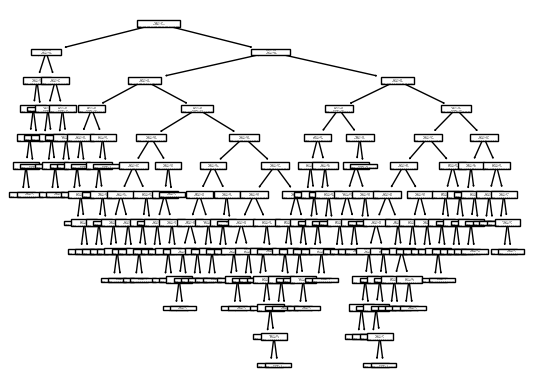

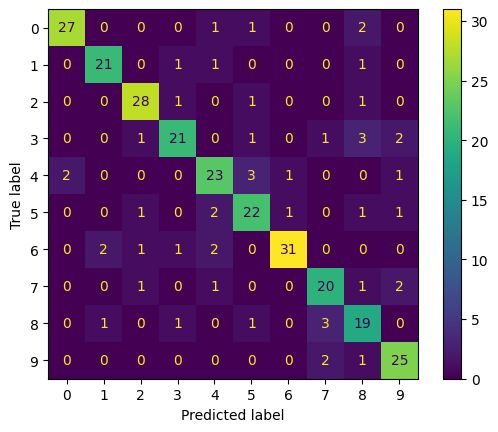

In [31]:
x_train2, x_val, y_train2, y_val = train_test_split(X_trainDigit, Y_trainDigit, test_size=0.2)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, confusion_matrix

parameters = {'max_depth': [i for i in range(14, 60)], 'min_samples_leaf': [i for i in range(1, 5)], 'min_samples_split': [i for i in range(2, 20, 2)]}

# Avec GridSearchCV
#clf = tree.DecisionTreeClassifier()
#clf = GridSearchCV(clf, parameters)
#clf.fit(x_train, y_train)

# Avec RandomizedSearchCV
clf = tree.DecisionTreeClassifier()
clf = RandomizedSearchCV(clf, parameters, n_iter=50, random_state=42)
clf.fit(x_train2, y_train2)

tree.plot_tree(clf.best_estimator_)

y_pred = clf.best_estimator_.predict(x_val)

print("best parameters:", clf.best_params_)
print("accuracy:", accuracy_score(y_val, y_pred))
print("recall:", recall_score(y_val, y_pred, average='micro'))
print("f1_score:", f1_score(y_val, y_pred, average='micro'))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred)

séparer les donnéees :

on a b esoin de séparer les données pour avoir des données de test et des données d'entrainement de la machine 

# Partie 1 PCA

In [62]:
# reading the dataset
from sklearn.decomposition import PCA
X, y = datasets.load_digits(return_X_y=True)
pca4 = PCA(n_components=4)
pca4.fit(X)
X4 = pca4.transform(X)
print("explained variance : ", pca4.explained_variance_ratio_)
b=False
for i in range(5):
    pca4 = PCA(n_components=i)
    pca4.fit(X)
    X4 = pca4.transform(X)
    if np.sum(pca4.explained_variance_ratio_)>0.95 and b==False:
        print("explained variance : ", pca4.explained_variance_ratio_)
        result=i
        b=True
print(result)




explained variance :  [0.14890594 0.13618771 0.11794594 0.08409979]
2


la dimension minimale qui explique 95% de la variance est de 2

time taken : -0.02838611602783203


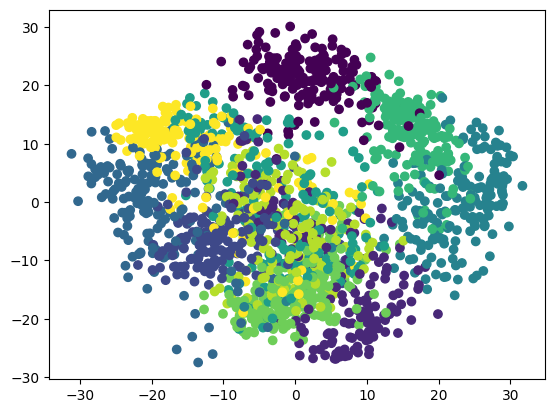

In [63]:

import time

pca2 = PCA(n_components=2)

begintime=time.time()
pca2.fit(X)
X2 = pca4.transform(X)
endtime=time.time()

print("time taken : "+str(begintime-endtime))
plt.scatter(X2[:,0],X2[:,1],c=y)

# Partie 2 tnse et comparaisons

time taken : -12.008545160293579
3594


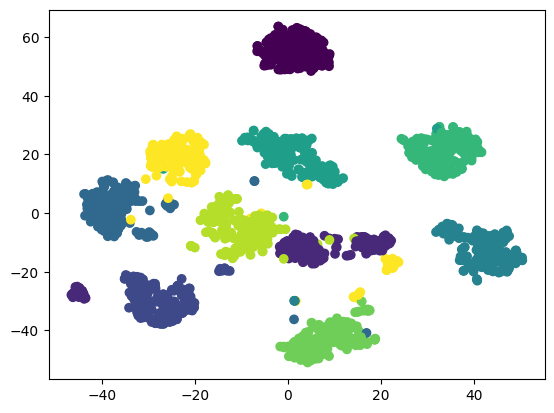

In [64]:
from sklearn import manifold
import time

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
begintime=time.time()
X_tsne = tsne.fit_transform(X)
endtime=time.time()
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y)
print("time taken : "+str(begintime-endtime))
print(X_tsne.size)

tnse est 500 fois plus lent que PCA à la taille de données qu'on a actuellement 




In [59]:
# reading the dataset
y = digits.target
X_trainDigit, X_testDigit, Y_trainDigit, Y_testDigit = train_test_split(X_tsne, y, test_size=0.2, random_state=0)
myTreeDigit = tree.DecisionTreeClassifier(max_depth=4)



# split into train and test datasets
from sklearn.model_selection import train_test_split

myTreeDigit.fit(X_trainDigit, Y_trainDigit)
ypredDigit = myTreeDigit.predict(X_testDigit)
print (accuracy_score(Y_testDigit,ypredDigit))
tree.plot_tree(myTreeDigit, rounded=True, filled=True)

ValueError: Found input variables with inconsistent numbers of samples: [150, 1797]